## BOOK RECOMMENDATION & SEARCH

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) #setting figure size

Source data from: https://www.kaggle.com/jealousleopard/goodreadsbooks

In [2]:

book_df = pd.read_csv('Entertainment/books.csv', error_bad_lines=False, parse_dates=['publication_date'])
book_df.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
book_df.shape

(11123, 12)

In [4]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [5]:
# check languages of books
book_df['language_code'].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

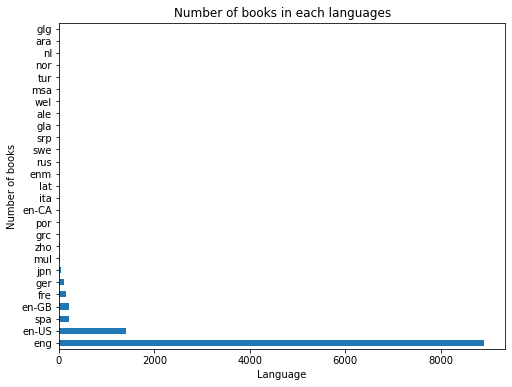

In [6]:
#visualize number of books in each language
lang_series = book_df['language_code'].value_counts()
plt.figure()
ax = lang_series.plot.barh(title='Number of books in each languages')
ax.set_xlabel('Language')
ax.set_ylabel('Number of books')
plt.show()

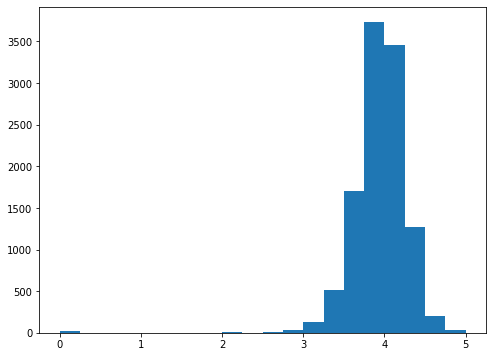

In [7]:
#plot histogram of average_rating
plt.hist(book_df['average_rating'], bins=20)
plt.show()

In [8]:
#get the matrix of tf-idf vectors
tfidf = TfidfVectorizer(stop_words='english')
tfidf_book_titles = tfidf.fit_transform(book_df['title'])

In [9]:
from sklearn.metrics.pairwise import linear_kernel      #faster than cosine_similarity
cosine = linear_kernel(tfidf_book_titles, tfidf_book_titles)
cosine

array([[1.        , 0.71276342, 0.71518849, ..., 0.        , 0.        ,
        0.        ],
       [0.71276342, 1.        , 0.72940912, ..., 0.        , 0.        ,
        0.        ],
       [0.71518849, 0.72940912, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [10]:
#create a datframe with title and indice
title_df = pd.DataFrame(book_df['title'])
title_df['indices'] = title_df.index
title_df.head()

,title,indices
0,Harry Potter and the Half-Blood Prince (Harry ...,0
1,Harry Potter and the Order of the Phoenix (Har...,1
2,Harry Potter and the Chamber of Secrets (Harry...,2
3,Harry Potter and the Prisoner of Azkaban (Harr...,3
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4


In [11]:
#function to get recommendations from the previous customer picked so the book_title MUST BE IN THE LIST OF EXISTING BOOK
def get_recommendations(book_title, number_of_recommendations):
    if (book_title in np.array(title_df['title'])):
        #get indice by book_title
        indice = title_df[title_df['title'] == book_title]['indices'].array[0]
        #get cosine by indice and create a dataframe, add 1 columns indices
        cosine_df = pd.DataFrame({'cos':cosine[indice]})
        cosine_df['indices'] = cosine_df.index
        #sort by cos to get to highest cosine similary
        sort_cosine_df = cosine_df.sort_values(by = 'cos', ascending=False)
       #choose list of indices have highest similary, limit by number_of_recommendation
        chosen_top_indices = sort_cosine_df[1:number_of_recommendations +1]['indices'].array
        #print out book title
        for ind in chosen_top_indices:
            print(f"{title_df[title_df['indices'] == ind]['title'].values[0]}")
    else:
        print('Sorry we dont have recommendations for your right now. Please try again later.')
    

In [12]:
#try to get recommendation from the book "The Ice-Shirt (Seven Dreams #1)"
get_recommendations('Poor People', 15)

The Book of Other People
The Working Poor: Invisible in America
All New People
A Man of the People
We Were Not Like Other People
The Rainbow People
The People of Paper
Europe and the People Without History
Independent People
Pathologies of Power: Health  Human Rights and the New War on the Poor
Banker to the Poor: Micro-Lending and the Battle Against World Poverty
The Five People You Meet in Heaven
The Five People You Meet in Heaven
What Do You Care What Other People Think?
Winning with People Workbook


In [13]:
#function to search random books (book_title may not be in the existing books) and I will limit only display 10 books only
def search_book(search_book):
    #append new book and transform to vectors
    new_df = pd.DataFrame({"title":[search_book], 
                    "indices":[title_df['indices'].max()+1]})
    new_title_df = title_df.append(new_df)

    tfidf_book_titles = tfidf.fit_transform(new_title_df['title'])
    new_cosine = linear_kernel(tfidf_book_titles, tfidf_book_titles)    

    #get indice by book_title
    indice = new_title_df[new_title_df['title'] == search_book]['indices'].array[0]

     #get cosine by indice and create a dataframe, add 1 columns indices
    cosine_df = pd.DataFrame({'cos':new_cosine[indice]})
    cosine_df['indices'] = cosine_df.index

     #sort by cos to get to highest cosine similary
    sort_cosine_df = cosine_df.sort_values(by = 'cos', ascending=False)
    #choose list of indices have highest similary, limit by number_of_recommendation
    chosen_top_indices = sort_cosine_df[1:11]['indices'].array
    
    print('WE HAVE 10 RESULTS AS FOLLOWING:')
    #print out book title by indices
    for ind in chosen_top_indices:
        print(f"{new_title_df[new_title_df['indices'] == ind]['title'].values[0]}")


In [14]:
#example: search random book title
search_book('Winter')

WE HAVE 10 RESULTS AS FOLLOWING:
It's Winter
Winter's Tales
The Winter's Tale
Winter's Tale
Winter (Four Seasons  #4)
Winter on the Farm
Brian's Winter
Winter of Magic's Return
The Winter of Our Discontent
Winter Cottage


### Book recommendation by Title and Summary

Data from https://www.kaggle.com/ymaricar/cmu-book-summary-dataset?select=booksummaries.txt

In [15]:
new_book_df = pd.read_csv('Entertainment/booksummaries.txt',error_bad_lines=False,delimiter="\t",header=None,\
                      names=["BookID", "Unknown", "Title","Author","Published Date","Tags","Summary"])
new_book_df.head(2)

,BookID,Unknown,Title,Author,Published Date,Tags,Summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."


In [16]:
new_book_df['title_summary'] = new_book_df['Title'] + ' ' + new_book_df['Summary']
new_book_df.head()

,BookID,Unknown,Title,Author,Published Date,Tags,Summary,title_summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca...","Animal Farm Old Major, the old boar on the Ma..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan...","A Clockwork Orange Alex, a teenager living in..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...,The Plague The text of The Plague is divided ...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...,An Enquiry Concerning Human Understanding The...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...,A Fire Upon the Deep The novel posits that sp...


In [21]:
#get the matrix of tf-idf vectors from the cleaned_summary
tfidf = TfidfVectorizer(stop_words='english')
tfidf_title_summary = tfidf.fit_transform(new_book_df['title_summary'])
cosine = linear_kernel(tfidf_title_summary, tfidf_title_summary)
cosine

array([[1.        , 0.01112758, 0.01196829, ..., 0.00772858, 0.00125136,
        0.01035577],
       [0.01112758, 1.        , 0.01828531, ..., 0.0067206 , 0.00165698,
        0.01035863],
       [0.01196829, 0.01828531, 1.        , ..., 0.01026542, 0.00815554,
        0.02040999],
       ...,
       [0.00772858, 0.0067206 , 0.01026542, ..., 1.        , 0.        ,
        0.01267054],
       [0.00125136, 0.00165698, 0.00815554, ..., 0.        , 1.        ,
        0.00797861],
       [0.01035577, 0.01035863, 0.02040999, ..., 0.01267054, 0.00797861,
        1.        ]])

In [22]:
#create a dataframe with title and indice
title_summary_df = pd.DataFrame({'title_summary':new_book_df['title_summary'], 'title':new_book_df['Title']})
title_summary_df['indices'] = title_summary_df.index
title_summary_df.head()

,title_summary,title,indices
0,"Animal Farm Old Major, the old boar on the Ma...",Animal Farm,0
1,"A Clockwork Orange Alex, a teenager living in...",A Clockwork Orange,1
2,The Plague The text of The Plague is divided ...,The Plague,2
3,An Enquiry Concerning Human Understanding The...,An Enquiry Concerning Human Understanding,3
4,A Fire Upon the Deep The novel posits that sp...,A Fire Upon the Deep,4


In [28]:
#get_recommendations by book title (from book title and summary) (10 recommendations)
def get_recommendations(book_title):
     #get indice by book_title
        indice = title_summary_df[title_summary_df['title'] == book_title]['indices'].array[0]
        cosine_df = pd.DataFrame({'cos':cosine[indice]})
        cosine_df['indices'] = cosine_df.index
        #sort by cos to get to highest cosine similary
        sort_cosine_df = cosine_df.sort_values(by = 'cos', ascending=False)
       #choose list of indices have highest similary, limit by number_of_recommendation
        chosen_top_indices = sort_cosine_df[1:11]['indices'].array
        #print out book title
        for ind in chosen_top_indices:
            print(f"{title_summary_df[title_summary_df['indices'] == ind]['title'].values[0]}")

In [27]:
get_recommendations('Animal Farm')

Animal Farm
Snowball's Chance
Fire and Sword
Moscow 1812: Napoleon's Fatal March
Freddy Goes to Florida
Piggie Pie
Jack the Hare and Mukuyu Forest
The True Story of the Three Little Pigs
Arctic Adventure
The Fields of Death
Animal World
